<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчет</a></span><ul class="toc-item"><li><span><a href="#Описание-исходных-данных:" data-toc-modified-id="Описание-исходных-данных:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Описание исходных данных:</a></span></li><li><span><a href="#Исследовательский-анализ-данных:" data-toc-modified-id="Исследовательский-анализ-данных:-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Исследовательский анализ данных:</a></span></li><li><span><a href="#Архитектура-выбранной-модели:" data-toc-modified-id="Архитектура-выбранной-модели:-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Архитектура выбранной модели:</a></span></li><li><span><a href="#Итоговая-метрика" data-toc-modified-id="Итоговая-метрика-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Итоговая метрика</a></span></li><li><span><a href="#Сравнение-предсказаний-модели-с-истинным-значением-целевой-переменной" data-toc-modified-id="Сравнение-предсказаний-модели-с-истинным-значением-целевой-переменной-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Сравнение предсказаний модели с истинным значением целевой переменной</a></span></li><li><span><a href="#Рекомендации-заказчику" data-toc-modified-id="Рекомендации-заказчику-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Рекомендации заказчику</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

**Заказчик:** Компания «Чётенькое такси».  
**Задача:** спрогнозировать количество заказов такси на следующий час,чтобы привлекать больше водителей в период пиковой нагрузки.  
**Датасет:** исторические данные о заказах такси в аэропортах.  


Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

План работ:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Создать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке.

Описание данных:  
 `num_orders` - количество заказов,  
 `datetime` информация о дате и времени, к которым относится указанное количествотзаказов такси.

## Подготовка

### Загрузка библиотек

In [52]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv("/datasets/taxi.csv")

In [3]:
df.head()

datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


проверим пропуски

In [5]:
df.isna().sum()

datetime      0
num_orders    0
dtype: int64

Пропущенных значений нет

Переведем данные в формат datetime, чтобы было удобно работать с датами и временем:

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


Все верно

Теперь установим дату индексом таблицы

In [8]:
data = df.set_index('datetime')

In [9]:
data.head(3)

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28

## Анализ

In [10]:
data.index.is_monotonic

True

Временной ряд расположен в хронологическом порядке

In [11]:
print(data.index.min(),data.index.max())

2018-03-01 00:00:00 2018-08-31 23:50:00


В датафрейме представлен временной период с 2018-03-01 00:00:00 по 2018-08-31 23:50:00

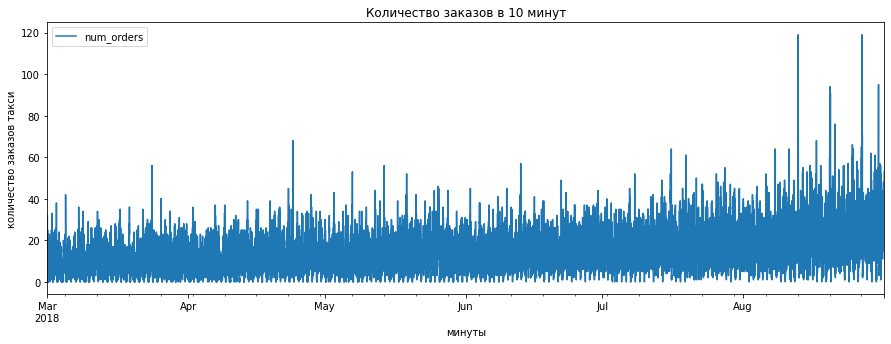

In [12]:
data.plot(figsize =(15,5), xlabel ="минуты", ylabel = "количество заказов такси", title = "Количество заказов в 10 минут");

Шумновато в данных, выполним ресемплирование с частоты раз в 10 минут перейдем на раз в час (так как прогноз необходимо сформировать на ближайщий час все значения попавшие во временной интервал часа просуммируем):

In [13]:
data = data.resample('1H').sum()

In [14]:
data.shape

(4416, 1)

Количество точек сократилось в 6,5 раз

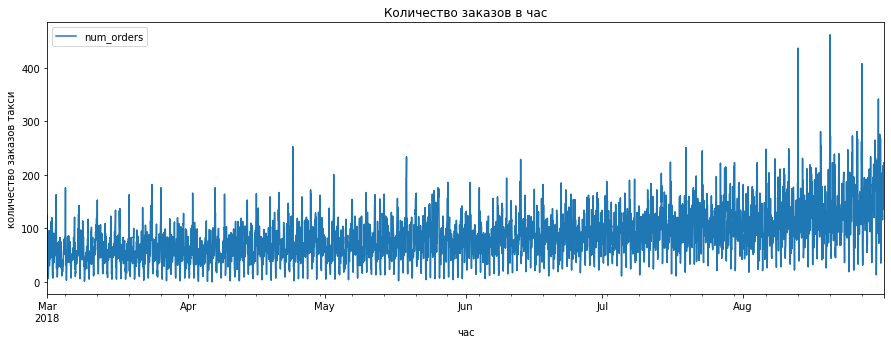

In [15]:
data.plot(figsize =(15,5),xlabel ="час", ylabel = "количество заказов такси", title = "Количество заказов в час");

Лучше, уже намечается тенденция роста количества заказов к периоду отпусков май-август. Но можно еще попытаться сгладить колебания, взяв среднее значение за сутки.

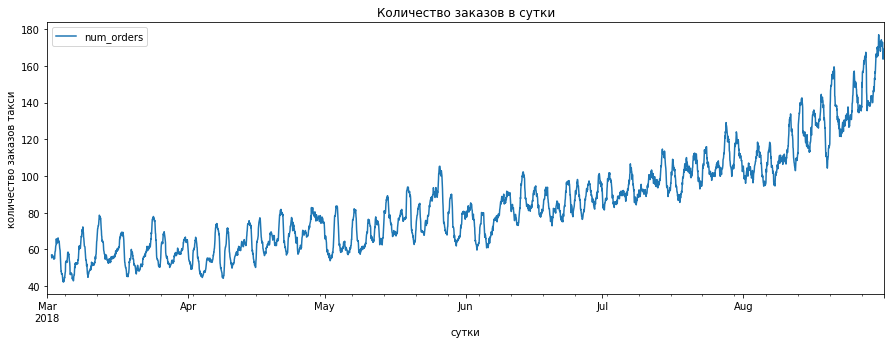

In [16]:
data.rolling(24).mean().plot(figsize =(15,5),xlabel ="сутки", ylabel = "количество заказов такси", title = "Количество заказов в сутки" );

В этом временном ряду обраружен тренд на рост количества заказов от весенних месяцев к летним. Амплитуда колебаний остается примерно постоянной на протяжении всего ряда,но при этом, происходит рост среднего значения от марта к августу.

Попробуем увеличить масштаб,  взяв среднее значение заказов за неделю.

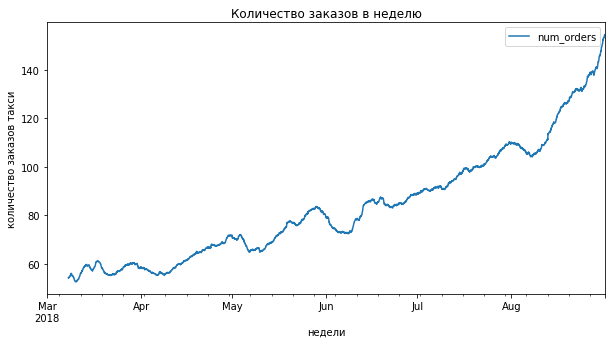

In [17]:
data.rolling(168).mean().plot(figsize =(10,5),xlabel ="недели", ylabel = "количество заказов такси",
                              title = "Количество заказов в неделю");

Разложим временной ряд на тренд, сезонность и шум:

In [18]:
decomposed = seasonal_decompose(data)

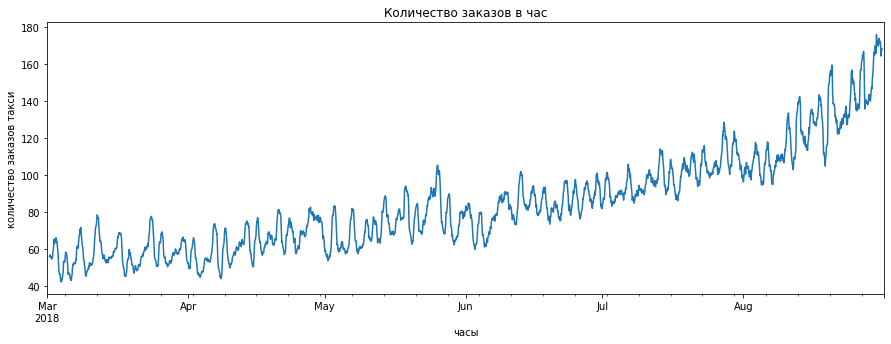

In [19]:
decomposed.trend.plot(figsize = (15,5),xlabel ="часы", ylabel = "количество заказов такси", title = "Количество заказов в час");

Посмотрим есть ли сезонность на уровне месяца

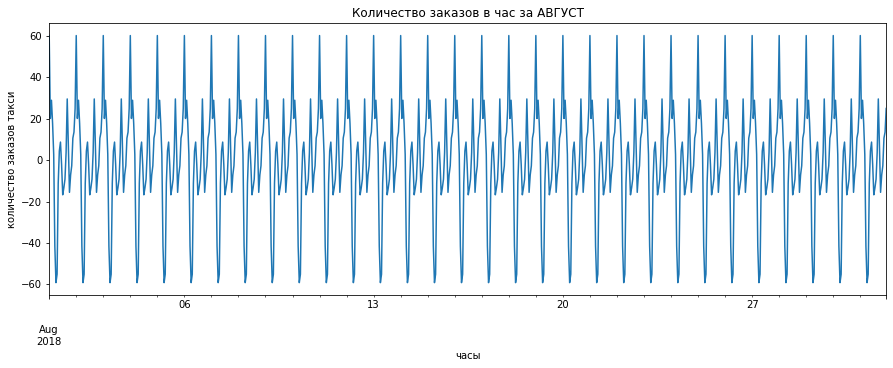

In [20]:
decomposed.seasonal["2018-08"].plot(figsize = (15,5),xlabel ="часы", ylabel = "количество заказов такси", title = "Количество заказов в час за АВГУСТ");

Есть суточная цикличность, посмотрим поближе

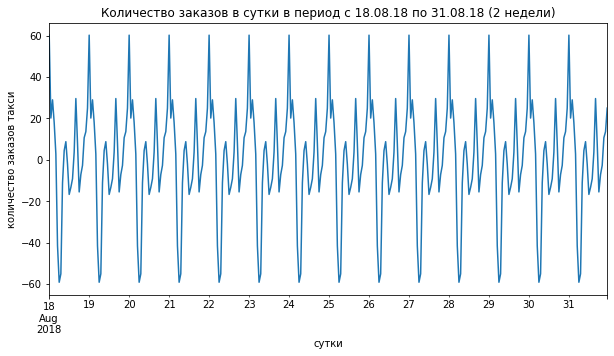

In [21]:
decomposed.seasonal['2018-08-18':"2018-08-31"].plot(figsize = (10,5),xlabel ="сутки",
                                                    ylabel = "количество заказов такси", 
                                                    title = "Количество заказов в сутки в период с 18.08.18 по 31.08.18 (2 недели)");

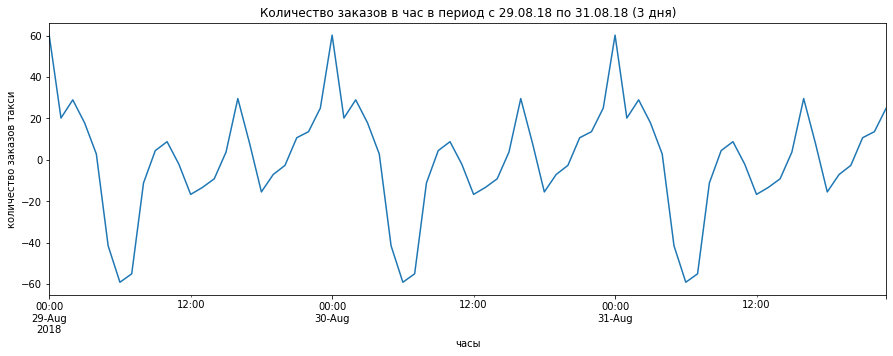

In [22]:
decomposed.seasonal['2018-08-29':'2018-08-31'].plot(figsize = (15,5),xlabel ="часы", ylabel = "количество заказов такси", title = "Количество заказов в час в период с 29.08.18 по 31.08.18 (3 дня)");

А что происходит с количеством заказов в течении дня

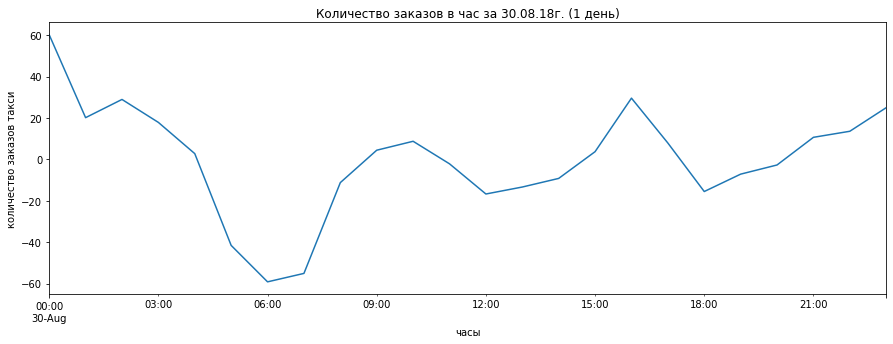

In [23]:
decomposed.seasonal['2018-08-30'].plot(figsize = (15,5),xlabel ="часы", ylabel = "количество заказов такси", title = "Количество заказов в час за 30.08.18г. (1 день)");

В случае нашего датафрейма мы наблюдаем тренд роста количества заказов такси в сезон отпусков и сезонность количества заказов в весенний и летний периоды (это предположение, по графику подтвердить сезонность сложно). Похоже, что до июля месяца тренд на рост заказов был линейным, а с июля появляется некая квадратичность.

Таким образом, учитывая поставленную задачу спрогнозировать количество заказов такси на период в 1 час,самыми интересными находками в представленном временном ряду будет суточная цикличность заказов в 24 часа,  для почасового прогноза ближайшие дни и часы важнее отдаленных недель, и тем более, месяцев.

## Создание признаков

Создадим из представленных данные признаки для обучения модели:

In [24]:
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


Тренд на усреднение возьмем за сутки,корелляцию будем оценивать с рядами со сдвигом на 3 часа

In [25]:
make_features(data,3,24)

In [26]:
data.head()

num_orders  month  day  hour  dayofweek  lag_1  lag_2  \
datetime                                                                     
2018-03-01 00:00:00         124      3    1     0          3    NaN    NaN   
2018-03-01 01:00:00          85      3    1     1          3  124.0    NaN   
2018-03-01 02:00:00          71      3    1     2          3   85.0  124.0   
2018-03-01 03:00:00          66      3    1     3          3   71.0   85.0   
2018-03-01 04:00:00          43      3    1     4          3   66.0   71.0   

                     lag_3  rolling_mean  
datetime                                  
2018-03-01 00:00:00    NaN           NaN  
2018-03-01 01:00:00    NaN           NaN  
2018-03-01 02:00:00    NaN           NaN  
2018-03-01 03:00:00  124.0           NaN  
2018-03-01 04:00:00   85.0           NaN

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   month         4416 non-null   int64  
 2   day           4416 non-null   int64  
 3   hour          4416 non-null   int64  
 4   dayofweek     4416 non-null   int64  
 5   lag_1         4415 non-null   float64
 6   lag_2         4414 non-null   float64
 7   lag_3         4413 non-null   float64
 8   rolling_mean  4392 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 345.0 KB


Разобъем датафрейм на обучающую, валидационную и тестовую выборку. Помним, что перемешивать исходные данные во временных зависимостях нельзя

In [28]:
data = data.dropna()

In [29]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)

In [30]:
print(train.shape)
print(test.shape)

(3952, 9)
(440, 9)


In [31]:
print(train.index.min(),train.index.max())

print(test.index.min(),test.index.max())

2018-03-02 00:00:00 2018-08-13 15:00:00
2018-08-13 16:00:00 2018-08-31 23:00:00


все верно

выделим целевой признак:

In [32]:
X_train = train.drop(['num_orders'],axis = 1)
Y_values = train['num_orders']

features_test = test.drop(['num_orders'],axis = 1)
target_test = test['num_orders']

## Обучение

Для предсказания количества заказов выберем регрессионные модели:

### Модель линейной регрессии

In [33]:
tscv = TimeSeriesSplit(n_splits=7) 
X = np.array(X_train.values)
Y = np.array(Y_values)

In [34]:
score_mean = []
for train,valid in tscv.split(X):
    model_lg = LinearRegression()
    model_lg.fit(X[train],Y[train])
    Y_pred = model_lg.predict(X[valid]) 
    Y_true = Y[valid]
    score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
print("RMSE =",np.array(score_mean).mean())  

RMSE = 31.200040730136145


### Модель решающего дерева

In [35]:
score_mean = []
for train,valid in tscv.split(X):
    model_dt = DecisionTreeRegressor(random_state = 12345)
    model_dt.fit(X[train],Y[train])
    Y_pred = model_dt.predict(X[valid]) 
    Y_true = Y[valid]
    score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
print(" RMSE =",np.array(score_mean).mean())  

 RMSE = 32.79287719961237


In [36]:
for i in range (1,13, 2):
    score_mean = []
    for train,valid in tscv.split(X):
        model_dt = DecisionTreeRegressor(random_state = 12345,max_depth = i)
        model_dt.fit(X[train],Y[train])
        Y_pred = model_dt.predict(X[valid]) 
        Y_true = Y[valid]
        score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
    print("Для max_depth = ",i," RMSE =",np.array(score_mean).mean())  

Для max_depth =  1  RMSE = 35.614984461741805
Для max_depth =  3  RMSE = 31.60260504458489
Для max_depth =  5  RMSE = 29.597774078354117
Для max_depth =  7  RMSE = 29.12913717185583
Для max_depth =  9  RMSE = 29.21257465368378
Для max_depth =  11  RMSE = 30.563795643166447


In [37]:
for j in range (2,13, 2):
    score_mean = []
    for train,valid in tscv.split(X):
        model_dt = DecisionTreeRegressor(random_state = 12345,max_depth = 7,min_samples_split =j)
        model_dt.fit(X[train],Y[train])
        Y_pred = model_dt.predict(X[valid]) 
        Y_true = Y[valid]
        score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
    print("Для min_samples_split = ",j," RMSE =",np.array(score_mean).mean())  

Для min_samples_split =  2  RMSE = 29.12913717185583
Для min_samples_split =  4  RMSE = 28.77259040341061
Для min_samples_split =  6  RMSE = 28.92092940398735
Для min_samples_split =  8  RMSE = 29.180128403510036
Для min_samples_split =  10  RMSE = 28.450666758266657
Для min_samples_split =  12  RMSE = 28.3333533094844


In [38]:
score_mean = []
for train,valid in tscv.split(X):
    model_dt = DecisionTreeRegressor(random_state = 12345,max_depth = 7,min_samples_split = 10)
    model_dt.fit(X[train],Y[train])
    Y_pred = model_dt.predict(X[valid]) 
    Y_true = Y[valid]
    score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
print(" RMSE =",np.array(score_mean).mean())  

 RMSE = 28.450666758266657


### Модель случайного леса

In [39]:
score_mean = []
for train,valid in tscv.split(X):
    model_rf1 = RandomForestRegressor(random_state = 12345)
    model_rf1.fit(X[train],Y[train])
    Y_pred = model_rf1.predict(X[valid]) 
    Y_true = Y[valid]
    score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
print(" RMSE =",np.array(score_mean).mean())  

 RMSE = 24.81136714628236


Теперь подберем гиперпараметры:

In [40]:
for i in range (10, 101, 10):
    score_mean = []
    for train,valid in tscv.split(X):
        model_rf = RandomForestRegressor(random_state = 12345,max_depth = i)
        model_rf.fit(X[train],Y[train])
        Y_pred = model_rf.predict(X[valid]) 
        Y_true = Y[valid]
        score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
    print("Для max_depth = ",i," RMSE =",np.array(score_mean).mean())  

Для max_depth =  10  RMSE = 24.93299970993157
Для max_depth =  20  RMSE = 24.815905652663965
Для max_depth =  30  RMSE = 24.81136714628236
Для max_depth =  40  RMSE = 24.81136714628236
Для max_depth =  50  RMSE = 24.81136714628236
Для max_depth =  60  RMSE = 24.81136714628236
Для max_depth =  70  RMSE = 24.81136714628236
Для max_depth =  80  RMSE = 24.81136714628236
Для max_depth =  90  RMSE = 24.81136714628236
Для max_depth =  100  RMSE = 24.81136714628236


In [41]:
for j in range (10, 101, 10):
    score_mean = []
    for train,valid in tscv.split(X):
        model_rf = RandomForestRegressor(random_state = 12345,max_depth = 20,n_estimators = j)
        model_rf.fit(X[train],Y[train])
        Y_pred = model_rf.predict(X[valid]) 
        Y_true = Y[valid]
        score_mean.append(mean_squared_error(Y_true,Y_pred, squared = False))
    print("Для n_estimators = ",j," RMSE =",np.array(score_mean).mean())  

Для n_estimators =  10  RMSE = 25.73313208654415
Для n_estimators =  20  RMSE = 25.144465377408032
Для n_estimators =  30  RMSE = 24.97755413824705
Для n_estimators =  40  RMSE = 24.81987545147575
Для n_estimators =  50  RMSE = 24.835633819902004
Для n_estimators =  60  RMSE = 24.831664808401055
Для n_estimators =  70  RMSE = 24.817800705761247
Для n_estimators =  80  RMSE = 24.83262284323794
Для n_estimators =  90  RMSE = 24.838913775972724
Для n_estimators =  100  RMSE = 24.815905652663965


Наименьшее значение метрики RMSE для модели случайного леса при настройках гиперпараметров "по умолчанию".

## Тестирование

Самое маленькое значение ошибки RMSE у модели случайного леса, протестируем её на тестовой выборке :

In [42]:

X = features_test
Y = target_test

In [43]:
print(X.shape)
print(Y.shape)

(440, 8)
(440,)


In [44]:
model_rf1 = RandomForestRegressor(random_state = 12345)
model_rf1.fit(X_train,Y_values)

RandomForestRegressor(random_state=12345)

In [45]:

Y_pred = model_rf1.predict(X) 
Y_true = Y
print(" RMSE =",mean_squared_error(Y_true,Y_pred, squared = False))  

 RMSE = 47.23608560874158


In [47]:
Y_test_predict = pd.Series(data =Y_pred,index =features_test.index,name='num_orders_predict')
Y_test_true = target_test
test = pd.concat([Y_test_predict, Y_test_true], axis= 1)

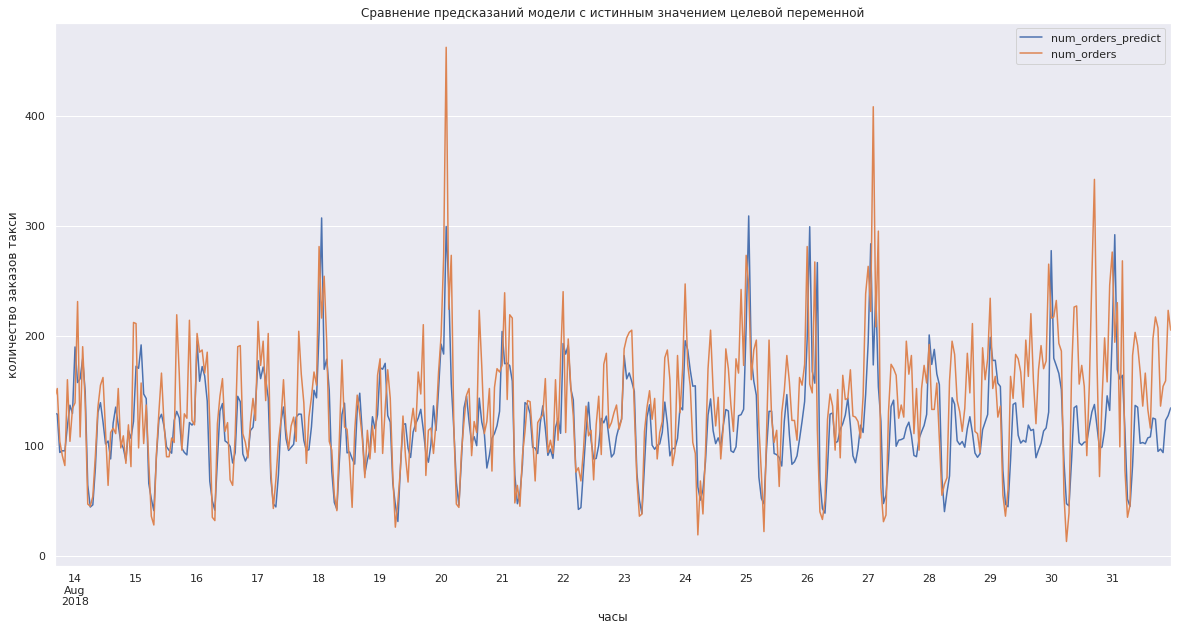

In [60]:
test.plot(figsize = (20,10),xlabel ="часы", ylabel = "количество заказов такси", 
          title = "Сравнение предсказаний модели с истинным значением целевой переменной");

Чем ближе к концу августа, тем хуже (с большей ошибкой) предсказательная способность модели.

## Отчет

### Описание исходных данных:


Представленный датасет содержит информацию о количестве заказов такси в течение 10 минут.   
Рассматриваемый временной интервал датасета  период с 2018-03-01 00:00:00 по 2018-08-31 23:50:00.

  



### Исследовательский анализ данных:

После усреднения  значений временного ряда в пределах 24 часов, был обраружен тренд на рост количества заказов от весенних месяцев к летним. Амплитуда колебаний остается примерно постоянной на протяжении всего ряда,но при этом, происходит рост среднего значения от марта к августу.

Похоже, что до июля месяца тренд на рост заказов был линейным, а с июля появляется некая квадратичность.
Мы наблюдаем тренд роста количества заказов такси в сезон отпусков и сезонность количества заказов в весенний и летний периоды (это предположение, по графику подтвердить сезонность сложно, для этого необходимы данные за 2 года минимум).

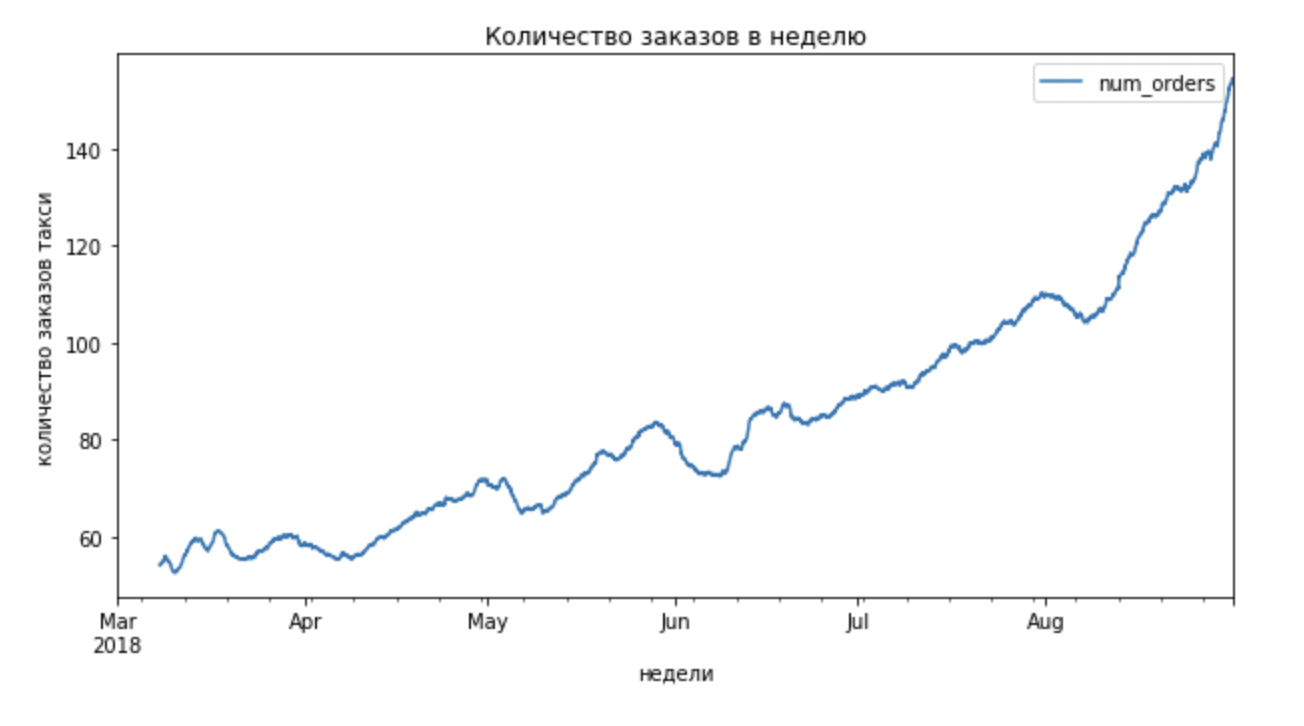

Затем было проведено ресемплирование с суммированием количества заказов за месяц, неделю, сутки и была обнаружена  суточная цикличность временного ряда:

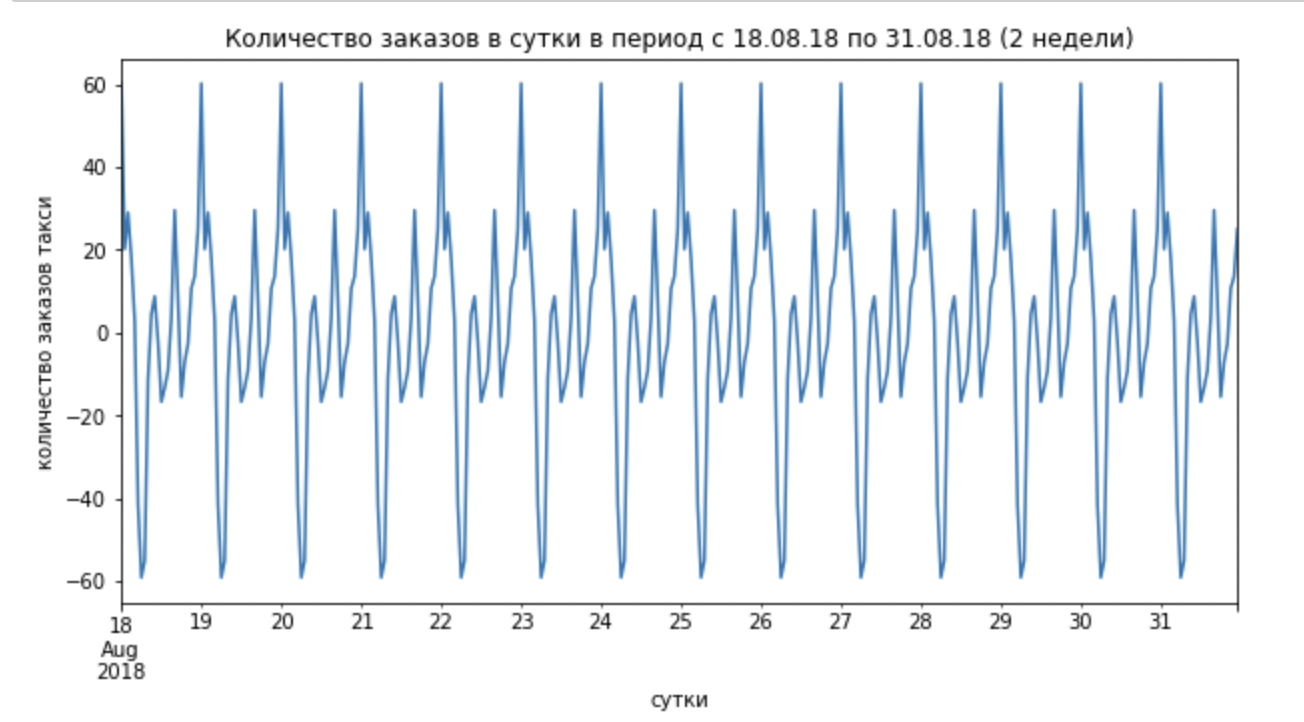

Таким образом, учитывая поставленную задачу спрогнозировать количество заказов такси на период в 1 час,самыми интересными находками в представленном временном ряду оказались суточная цикличность в 24 часа, для почасового прогноза ближайшие часы и  дни важнее отдаленных недель, и тем более, месяцев.

Для обучения модели были созданы дополнительные признаки: 

     1   month         номер месяца  
     2   day           номер дня месяца  
     3   hour          значения часа 
     4   dayofweek     номер дня недели  
     5   lag_1         сдвиг временного ряда на 1 час
     6   lag_2         сдвиг временного ряда на 2 часа
     7   lag_3         сдвиг временного ряда на 3 часа
     8   rolling_mean  скользящее среднее с размером окна в 24 часа

При разделении выборки на тестовую и обучающую исключили перемешивание (shuffle=False),так как нам необходимо сохранить зависимость временного ряда и не допустить утечки признака.

### Архитектура выбранной модели:


На тестовой выборке подходящее значение метрики RMSE < 48 было достигнуто на модели случайного леса, остальные не достигли требуемой в проекте точности.

**Название модели:**             RandomForestRegressor    

**Библиотека:**                 scikit-learn   
        
**Тип модели:**                регрессионная модель   

**Подобранные гиперпараметры:** random_state = 12345,  
                             остальные значения настройки "по -умолчанию"      
                              
                              
**Методика обучения и    
оценки качества модели:**        метрика RMSE(корень квадратный из среднеквадратичной ошибки, единицы измерения - количество заказов)

### Итоговая метрика

Расхождение целевой метрики модели RMSE на обучающих данных и тестовых почти в 2 раза, модель переобучилась, но значение целевой метрики соответсвует параметр:

RMSE_train = 24.81136714628236 заказов  
RMSE_test  = 47.23608560874158 заказов

### Сравнение предсказаний модели с истинным значением целевой переменной

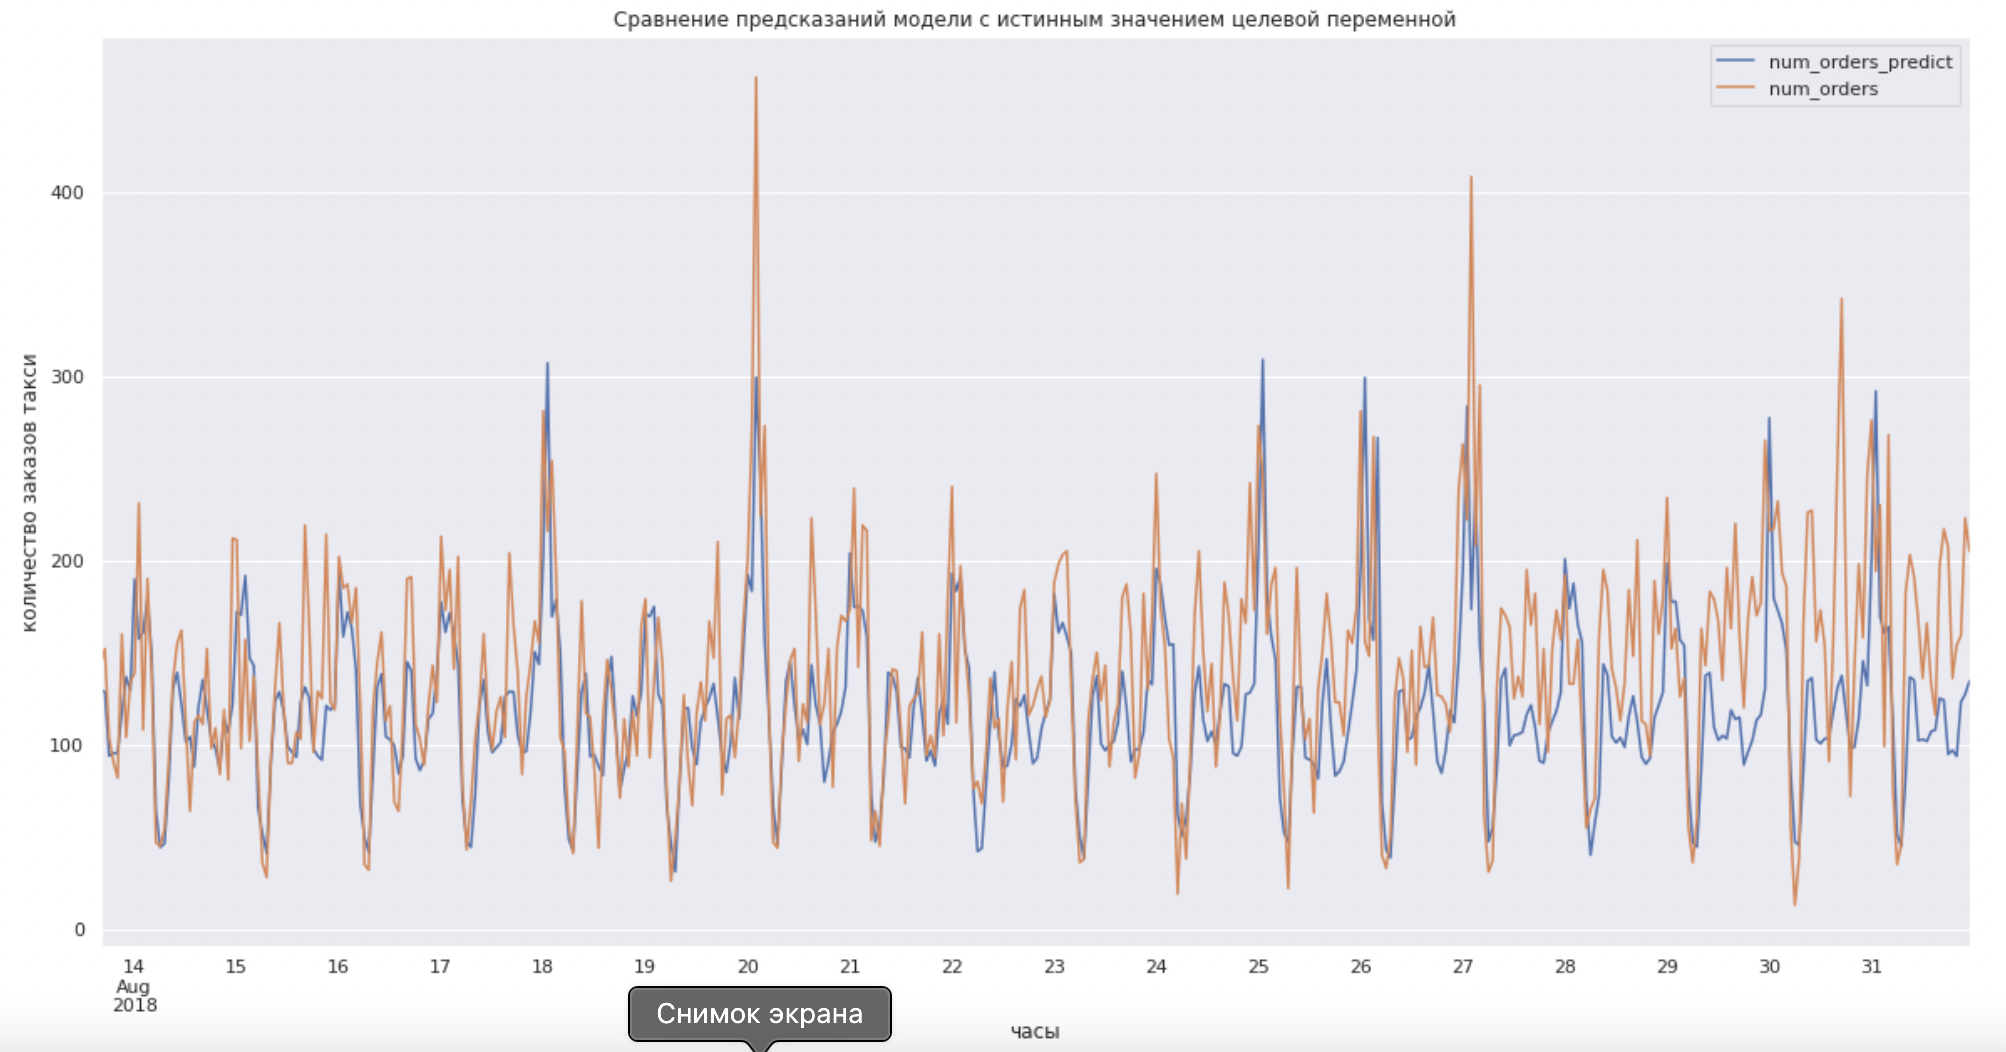

Видно, что ближе к 31 августа предсказанные значения все больше расходятся с истинными значениями количества заказов,модель недооценивает количество заказов, показывает значения ниже истинных. Это связано с влиянием данных из других месяцев.

### Рекомендации заказчику 

Было бы интересно проанализировать данные за период в 2 года, посмотреть на сезонность в данных. Созданная модель актуальна только для предсказания количества заказов на ближайший час, для конкретного месяца. Более точные предсказания можно получить на других месяцах после дообучения под конкретные периоды.